# Randomization Procedure

In this file, I draw all random values which we need when conducting the experiment. 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from bargain_live.bargaining_functions import create_participant_data, create_group_matrices_for_all_rounds
from pathlib import Path
import pickle
import os
# Set the random seed for reproducibility

current_dir = Path(os.getcwd())

In [2]:
# Create the four buyer valuations
for i in range(1,5):
    np.random.seed(40 + i)
    globals()[f'buyer_valuations_{i}'] = np.random.randint(0, 61, 20)

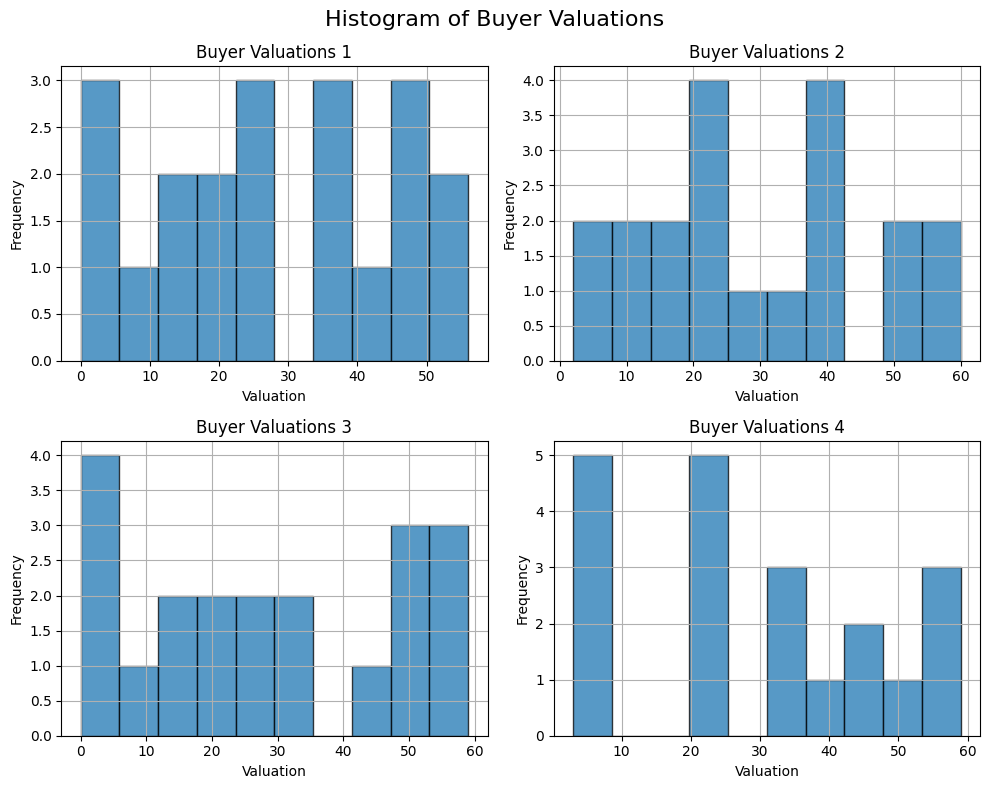

In [3]:
# Create a plot grid for histograms
# Store the valuation vectors in a list
buyer_valuations = [
    buyer_valuations_1,
    buyer_valuations_2,
    buyer_valuations_3,
    buyer_valuations_4
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogram of Buyer Valuations', fontsize=16)

# Plot histograms for each buyer valuation vector
for i, ax in enumerate(axes.flat, start=1):
    ax.hist(buyer_valuations[i-1], bins=10, alpha=0.75, edgecolor='black')
    ax.set_title(f'Buyer Valuations {i}')
    ax.set_xlabel('Valuation')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [4]:
for number_of_groups in [1,2,3,4]:
    participant_data = create_participant_data(number_of_groups, buyer_valuations)

    group_matrices = create_group_matrices_for_all_rounds(participant_data)

    participant_data.to_pickle(current_dir / "bargain_live" /"randomization_values" / f"participant_data_{number_of_groups}_groups.pkl")

    with open(current_dir / "bargain_live" / "randomization_values" / f'round_groupings_{number_of_groups}_groups.pkl', 'wb') as pickle_file:
        pickle.dump(group_matrices, pickle_file)

# Graveyard

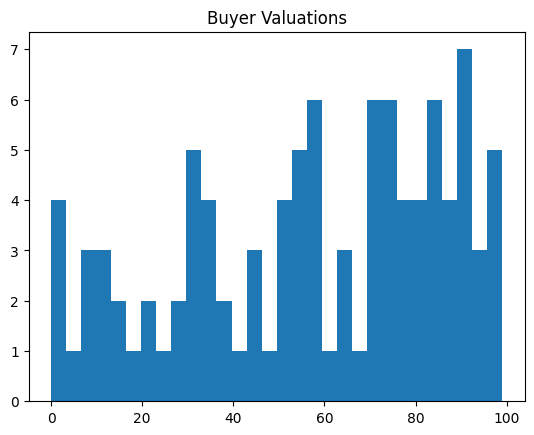

In [8]:
#Initialize Buyer Valuation
buyer_valuations = np.random.randint(0, 101, 100)
plt.hist(buyer_valuations, bins=30)
plt.title("Buyer Valuations")
plt.show()

In [64]:
for number_of_groups in range(1, 11):
    random_values = create_random_values_dataframe(
        number_of_groups=number_of_groups, 
        buyer_valuations=buyer_valuations
    )
    random_values.to_csv(current_dir / "bargain_live" / "randomization_values" / f"random_values_{number_of_groups}_groups.csv")